# Hotel Booking Status Prediction
## Introduction
This project predicts **hotel booking status** (Cancelled/Not Cancelled) using machine learning
### Objectives:
- Explore and clean the dataset
- Perform Exploratory Data Analysis
- Build Machine Learning Models to predicbooking status
- Compare Models Accuracy using  Accuracy Score,Recall score etc

# Importing Libraries and Dataset

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report
plt.style.use("ggplot")

In [216]:
data=pd.read_csv(r"D:\Datasets for projects\Hotel Reservations.csv")

#  Data Cleaning & Exploratory Data Analysis (EDA)

### Steps:
1. Checked for missing values and duplicates  
2. Removed outliers using IQR method  
3. Explored categorical & numerical features  
4. Visualized distributions (boxplots, histograms, countplots)  

These steps help us understand booking trends and prepare data for modeling.


In [217]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [218]:
data.shape

(36275, 19)

In [219]:
data.isnull().sum().sum()

np.int64(0)

In [220]:
data.duplicated().sum()

np.int64(0)

In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [222]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [223]:
check_outlier=data[["no_of_children","no_of_week_nights","lead_time","no_of_previous_cancellations","no_of_previous_bookings_not_canceled","avg_price_per_room"]]
check_outlier

,no_of_children,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room
0,0,2,224,0,0,65.00
1,0,3,5,0,0,106.68
2,0,1,1,0,0,60.00
3,0,2,211,0,0,100.00
4,0,1,48,0,0,94.50
...,...,...,...,...,...,...
36270,0,6,85,0,0,167.80
36271,0,3,228,0,0,90.95
36272,0,6,148,0,0,98.39
36273,0,3,63,0,0,94.50


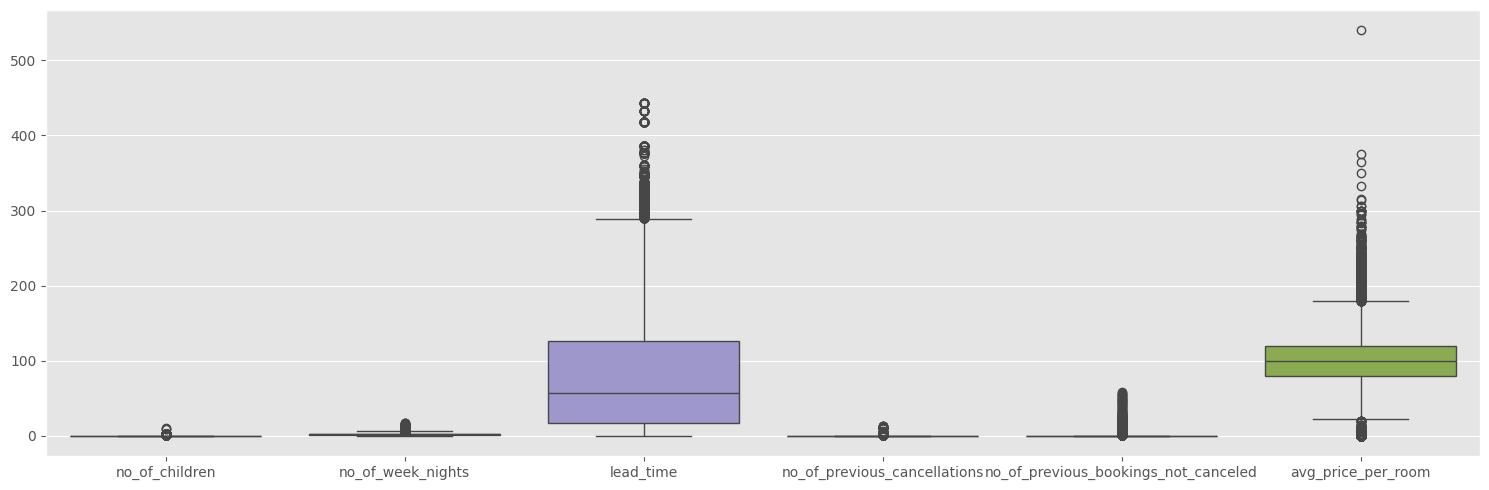

In [224]:
plt.figure(figsize=(15,5))
sns.boxplot(data=check_outlier)
plt.tight_layout()

In [225]:
cols=data[["lead_time","no_of_previous_bookings_not_canceled","avg_price_per_room"]]
for col in cols:
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    min=q1-(1.25*iqr)
    max=q3+(1.25*iqr)
    data=data[(data[col] >= min) & (data[col] <= max)]

Text(0.5, 0, 'Previous Bookings Not Cancelled')

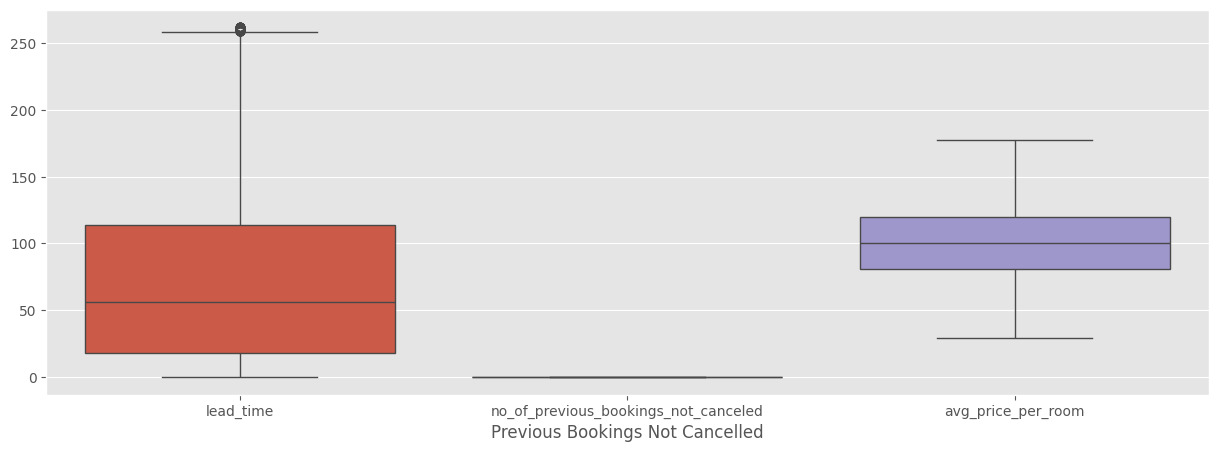

In [226]:
plt.figure(figsize=(15,5))
plt.tight_layout()
sns.boxplot(data=data[["lead_time","no_of_previous_bookings_not_canceled","avg_price_per_room"]])
plt.xlabel("Previous Bookings Not Cancelled")

[Text(0, 0, '24387'), Text(0, 0, '5014'), Text(0, 0, '2270')]

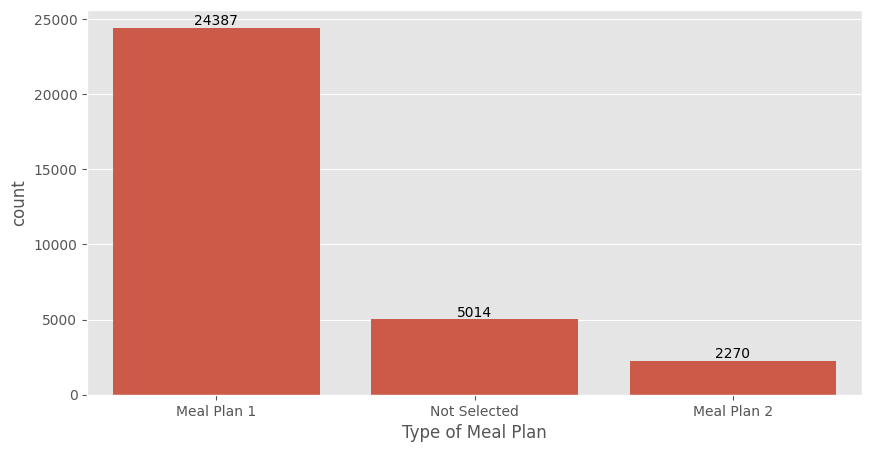

In [227]:
plt.figure(figsize=(10,5))
plt.xlabel("Type of Meal Plan")
ax=sns.countplot(data=data, x=data["type_of_meal_plan"])
ax.bar_label(ax.containers[0])

In [228]:
data["repeated_guest"].value_counts()

repeated_guest
0    31564
1      107
Name: count, dtype: int64

[Text(0, 0, '8842'),
 Text(0, 0, '21286'),
 Text(0, 0, '1420'),
 Text(0, 0, '109'),
 Text(0, 0, '14')]

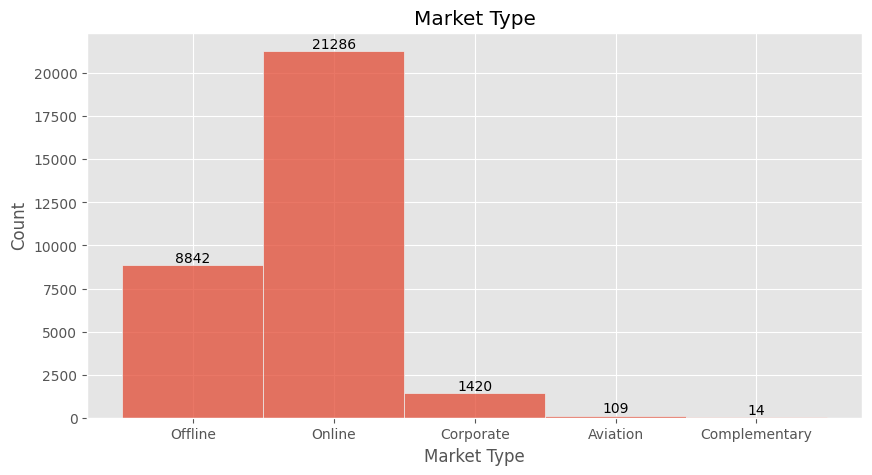

In [229]:
plt.figure(figsize=(10,5))
plt.title("Market Type")
ax=sns.histplot(data=data, x=data["market_segment_type"])
plt.xlabel("Market Type")
ax.bar_label(ax.containers[0])

In [230]:
gp=data["avg_price_per_room"].round()
az=gp.value_counts().reset_index().sort_values("avg_price_per_room",ascending=False).head(10)
az

,avg_price_per_room,count
97,177.0,84
116,176.0,40
119,175.0,32
113,174.0,51
128,173.0,20
126,172.0,23
118,171.0,35
114,170.0,49
109,169.0,57
75,168.0,156


Text(0.5, 0, 'price per room')

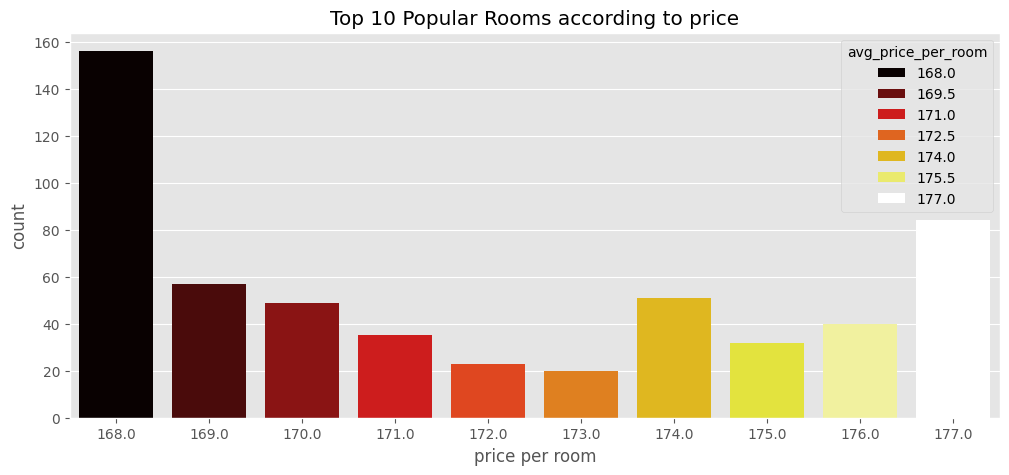

In [231]:
plt.figure(figsize=(12,5))
ax=sns.barplot(data=az,x="avg_price_per_room",y='count',palette="hot",hue="avg_price_per_room")
plt.title('Top 10 Popular Rooms according to price')
plt.xlabel("price per room")

[Text(0, 0, '21929'), Text(0, 0, '9742')]

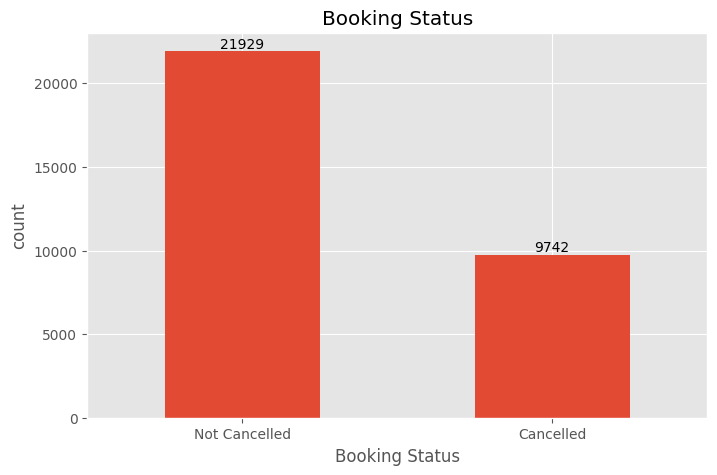

In [232]:
plt.figure(figsize=(8,5))
ax=data["booking_status"].value_counts().plot(kind="bar",title="Booking Status")
plt.xlabel("Booking Status")
plt.xticks([0,1],["Not Cancelled","Cancelled"],rotation=0)

plt.ylabel("count")
ax.bar_label(ax.containers[0])


[Text(0, 0, '118'),
 Text(0, 0, '6423'),
 Text(0, 0, '23049'),
 Text(0, 0, '2078'),
 Text(0, 0, '3')]

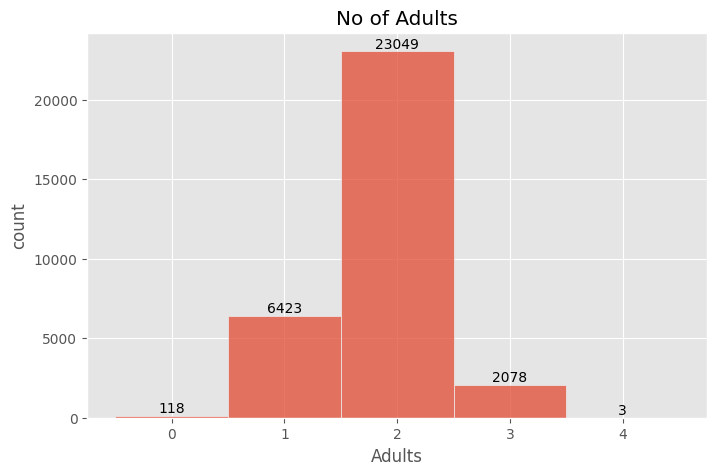

In [233]:
plt.figure(figsize=(8,5))
ax=sns.histplot(data=data,x="no_of_adults",discrete=True)
plt.title("No of Adults")
plt.xlabel("Adults")
plt.ylabel("count")
ax.bar_label(ax.containers[0])

### Dropped Irrelevant Columns

In [234]:
df=data.drop(columns=data[["Booking_ID","no_of_children","no_of_previous_cancellations","no_of_previous_bookings_not_canceled","required_car_parking_space","arrival_year"]])

C:\Users\NOCS\AppData\Local\Temp\ipykernel_5616\247439333.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df["arrival_month"].value_counts(),palette="magma")


Text(0.5, 0, 'Month')

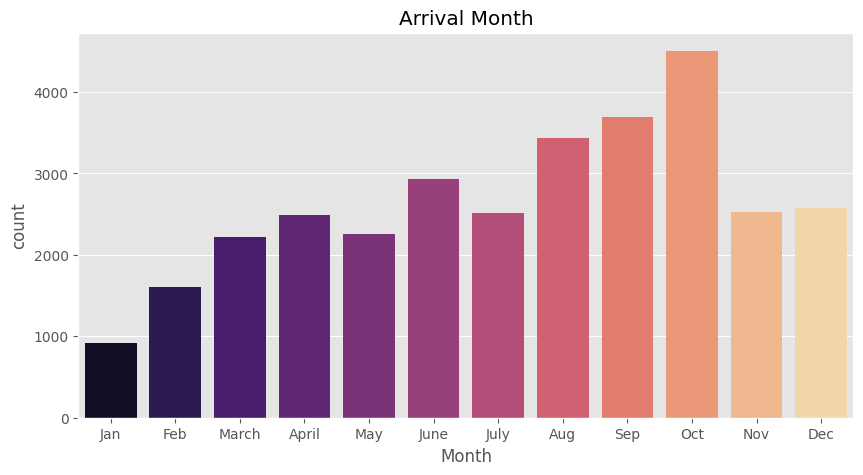

In [235]:
plt.figure(figsize=(10,5))
ax=sns.barplot(data=df["arrival_month"].value_counts(),palette="magma")
plt.title('Arrival Month')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],["Jan","Feb","March","April","May","June","July","Aug","Sep","Oct","Nov","Dec"],rotation=0)
plt.xlabel("Month")

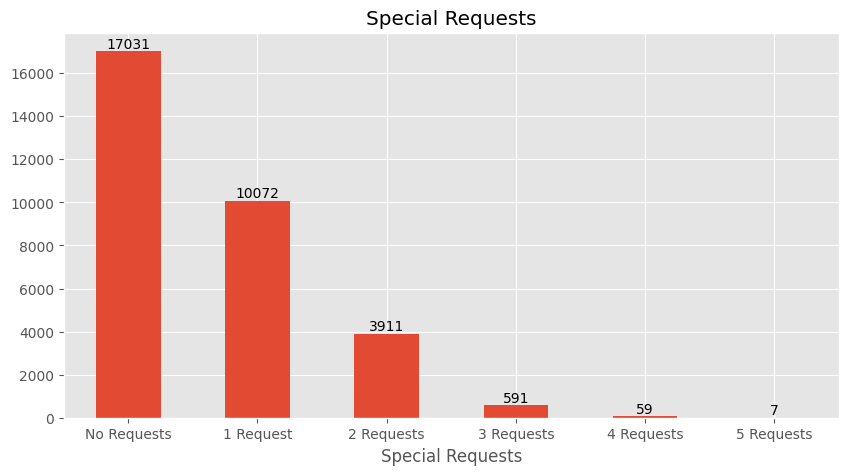

In [236]:
plt.figure(figsize=(10,5))
ax=df["no_of_special_requests"].value_counts().plot(kind="bar",title="Special Requests")
ax.bar_label(ax.containers[0])
plt.xticks([0,1,2,3,4,5],["No Requests","1 Request","2 Requests","3 Requests","4 Requests","5 Requests"],rotation=0)
plt.xlabel("Special Requests")
plt.show()

In [237]:
exp=df.groupby("room_type_reserved")["avg_price_per_room"].mean().reset_index()
exp

,room_type_reserved,avg_price_per_room
0,Room_Type 1,97.592432
1,Room_Type 2,90.507557
2,Room_Type 3,103.150000
3,Room_Type 4,123.858712
4,Room_Type 5,123.901472
5,Room_Type 6,157.767620
6,Room_Type 7,137.032778


Text(70.72222222222221, 0.5, 'Price Per Room')

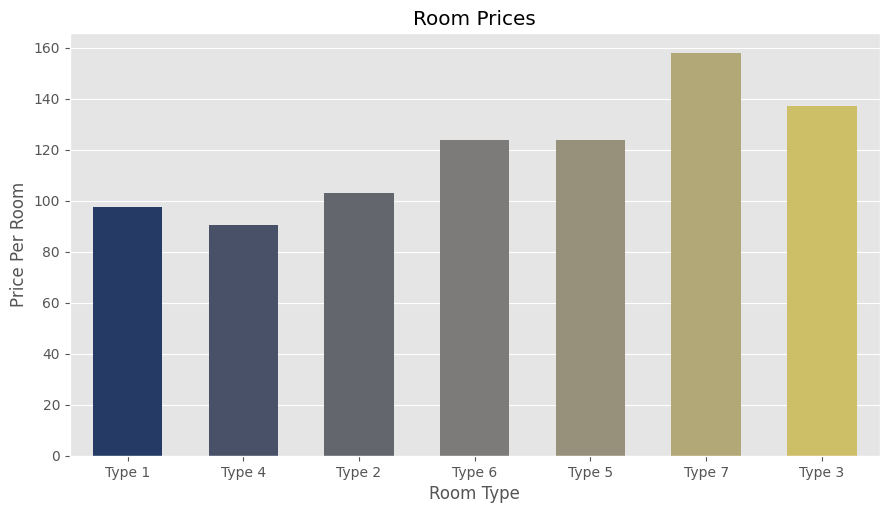

In [238]:
plt.figure(figsize=(9,5))
ax=sns.barplot(data=exp,x="room_type_reserved",y="avg_price_per_room",palette='cividis',hue="room_type_reserved",width=0.6)
plt.tight_layout()
plt.title("Room Prices")
plt.xticks([0,1,2,3,4,5,6],["Type 1","Type 4","Type 2","Type 6","Type 5","Type 7","Type 3"],rotation=0)
plt.xlabel("Room Type")
plt.ylabel("Price Per Room")

In [239]:
df["market_segment_type"].value_counts()

market_segment_type
Online           21286
Offline           8842
Corporate         1420
Aviation           109
Complementary       14
Name: count, dtype: int64

[Text(0, 0, '6903'),
 Text(0, 0, '13734'),
 Text(0, 0, '1206'),
 Text(0, 0, '72'),
 Text(0, 0, '14')]

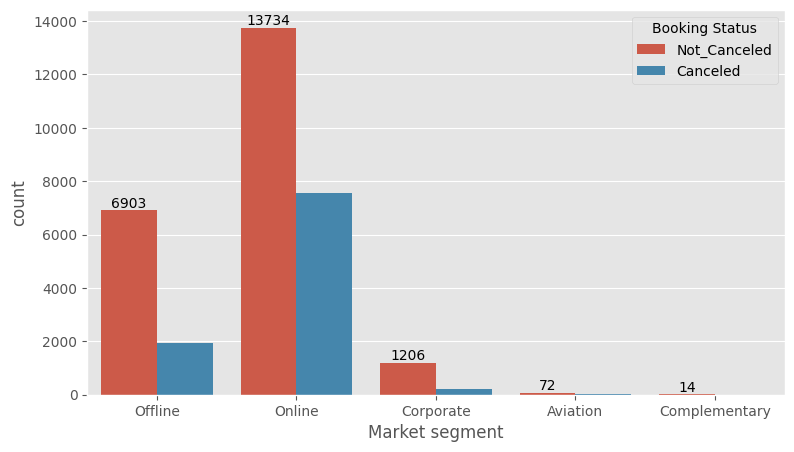

In [240]:
plt.figure(figsize=(9,5))
a=sns.countplot(data=df,x="market_segment_type",hue="booking_status")
plt.xlabel("Market segment")
plt.legend(title="Booking Status")
a.bar_label(a.containers[0])

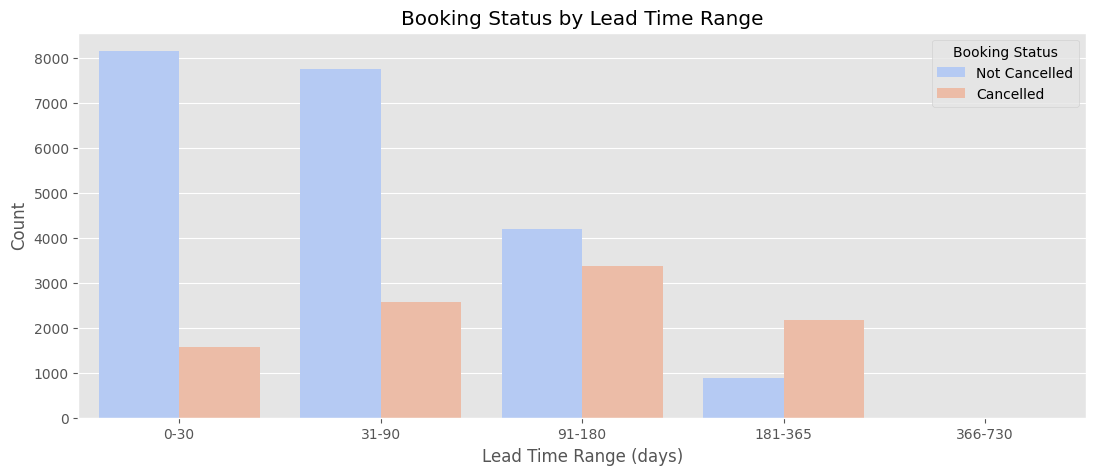

In [241]:
df["lead_time_bin"] = pd.cut(df["lead_time"], bins=[0,30,90,180,365,730], 
                             labels=["0-30","31-90","91-180","181-365","366-730"])

plt.figure(figsize=(13,5))
sns.countplot(data=df, x="lead_time_bin", hue="booking_status", palette="coolwarm")
plt.title("Booking Status by Lead Time Range")
plt.xlabel("Lead Time Range (days)")
plt.ylabel("Count")
plt.legend(title="Booking Status", labels=["Not Cancelled","Cancelled"])
plt.show()


# **Machine Learning**

## Feature Engineering

### Steps: 
- Encoded categorical variables using Label Encoding  
- Scaled numerical features (`lead_time`, `avg_price_per_room`, etc.)  
- Prepared final dataset for machine learning models  


In [242]:
le=LabelEncoder()
df2=df.copy()
for cols in df.select_dtypes("object"):
    df2[cols]=le.fit_transform(df2[cols])
df2

,no_of_adults,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,avg_price_per_room,no_of_special_requests,booking_status,lead_time_bin
0,2,1,2,0,0,224,10,2,3,0,65.00,0,1,181-365
1,2,2,3,2,0,5,11,6,4,0,106.68,1,1,0-30
2,1,2,1,0,0,1,2,28,4,0,60.00,0,0,0-30
3,2,0,2,0,0,211,5,20,4,0,100.00,0,0,181-365
4,2,1,1,2,0,48,4,11,4,0,94.50,0,0,31-90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,2,6,0,3,85,8,3,4,0,167.80,1,1,31-90
36271,2,1,3,0,0,228,10,17,4,0,90.95,2,0,181-365
36272,2,2,6,0,0,148,7,1,4,0,98.39,2,1,91-180
36273,2,0,3,2,0,63,4,21,4,0,94.50,0,0,31-90


In [243]:
x=df2.iloc[:,0:12]
y=df2.iloc[:,-2]

In [244]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [245]:
scaler=StandardScaler()
cols=["lead_time","arrival_month","arrival_date","avg_price_per_room"]
x_train[cols]=scaler.fit_transform(x_train[cols])
x_test[cols]=scaler.transform(x_test[cols])

## Machine Learning Models

We trained and evaluated three models:

1. Logistic Regression  
2. Random Forest Classifier  
3. Support Vector Machine (SVM)  

### Metrics Used:
- Accuracy  
- Precision  
- Recall  
- F1 Score  

In [246]:
lr=LogisticRegression(class_weight="balanced")
lr.fit(x_train,y_train)
predic=lr.predict(x_test)

In [247]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
pred=clf.predict(x_test)

In [248]:
svm=SVC()
svm.fit(x_train,y_train)
pred3=svm.predict(x_test)

In [249]:
results=pd.DataFrame({"Models":["LogisticRegression","RandomForestClassifier","SVC"],
                     "Accuracy Score":[accuracy_score(y_test,predic)*100,accuracy_score(y_test,pred)*100,accuracy_score(y_test,pred3)*100],
                     "Precision_score":[precision_score(y_test,predic)*100,precision_score(y_test,pred)*100,precision_score(y_test,pred3)*100],
                     "F1_score":[f1_score(y_test,predic)*100,f1_score(y_test,pred)*100,f1_score(y_test,pred3)*100],
                     "Recall_score":[recall_score(y_test,predic)*100,recall_score(y_test,pred)*100,recall_score(y_test,pred3)*100]})

In [250]:
results=results.round(2)
results

,Models,Accuracy Score,Precision_score,F1_score,Recall_score
0,LogisticRegression,75.49,88.40,81.3,75.25
1,RandomForestClassifier,89.09,91.22,92.4,93.60
2,SVC,82.53,84.48,88.2,92.26


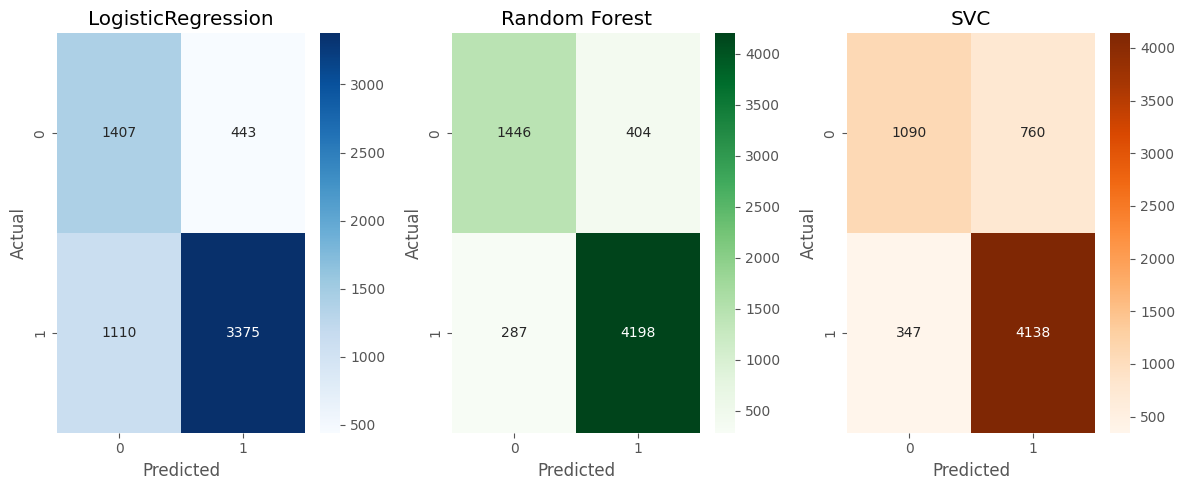

In [251]:
cm_lr=confusion_matrix(y_test,predic)
cm_clf=confusion_matrix(y_test,pred)
cm_svm=confusion_matrix(y_test,pred3)
fig,axes=plt.subplots(1,3,figsize=(12,5))
sns.heatmap(confusion_matrix(y_test,predic),annot=True,fmt='d',cmap="Blues",ax=axes[0])
axes[0].set_title("LogisticRegression")

sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Random Forest")

sns.heatmap(confusion_matrix(y_test, pred3), annot=True, fmt="d", cmap="Oranges", ax=axes[2])
axes[2].set_title("SVC")
 
for ax in axes:
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

# Insights:
- From the analysis, we can see that **Room Type 6** is the most expensive, while **Room Type 2** is the cheapest. This shows variation in pricing across room categories, which may influence booking status and customer choice. 
- Bookings with longer Lead Time are more likely to be cancelled.
- Random Forest Classifier model is performing the best.